In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

# Distributions

In [2]:
# We start by exploring some distributions. We will see how to generate samples from 
# various common probability distributions and how to evaluate the probability density
# function.

# Binomial Distribution

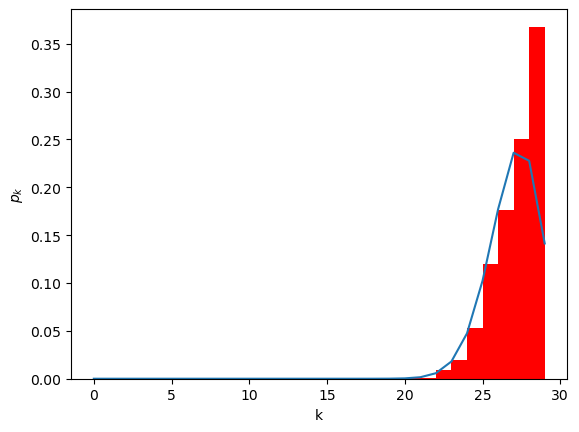

In [2]:
n=30
p=0.9
nsamp=1000
samples=np.random.binomial(n,p,nsamp)
x=np.arange(0,n)
counts,edges,patches=plt.hist(samples,bins=x,color="red",density=True)
plt.xlabel('k')
plt.ylabel('$p_k$')
y=stats.binom.pmf(x, n, p)
plt.plot(x, y)

In [3]:
# Q1) Draw samples from some of the following distributions, and compare the distribution to the theoretical 
# pmf or pdf:
#
# Poisson(10)
# Uniform[0,1]
# Normal(mu=10, sigma=3)
# Chi-squared with 30 degrees of freedom
# Student-t with 100 degrees of freedom
# F distrivbution with (6, 20) degrees of freedom
# Exponential(1)
# Gamma (n = 100, lambda = 1)
# Beta (16, 16)
# Cauchy (xz = 0, gamma = 1)

# Summary statistics

In [4]:
# Now we compute some summary statistics. We generate some samples from a normal distribution
# and then show how to compute sample means, variances, skewness, kurtosis etc.
mu=0
sigma=1
nsamp=100000
samples=np.random.normal(mu,sigma,nsamp)
mean=stats.tmean(samples)
variance=(stats.tstd(samples))**2
median=stats.scoreatpercentile(samples,50)
skewness=stats.skew(samples)
exkurt=stats.kurtosis(samples)
print("Mean = " + str(mean) + ", Median = " + str(median) + ", Variance = " + str(variance) + ", Skewness = " + str(skewness) + ", Excess Kurtosis =" + str(exkurt))

Mean = 0.0005639681499967257, Median = -0.0017011377919423005, Variance = 1.0014316670094399, Skewness = -0.003566891450665642, Excess Kurtosis =-0.029185809932984252


In [5]:
# The mode can also be computed, but output not usually informative for continuous distributions

mode=stats.mode(samples)
print("Mode = " + str(mode))

Mode = ModeResult(mode=-3.957313409513773, count=1)


In [6]:
# You can also get a number of summary statistics directly from the stats.describe() function
stats.describe(samples)

DescribeResult(nobs=100000, minmax=(-3.957313409513773, 4.200671230316601), mean=0.0005639681499967257, variance=1.00143166700944, skewness=-0.003566891450665642, kurtosis=-0.029185809932984252)

In [7]:
# Q2) The stats.moment(x, n) function allows you to compute the n'th moment of the samples stored in x. 
# Use this to compute the 5th moment of the samples generated above. Also compute the second, third 
# and fourth moments in this way and compare them to the values given by the direct functions above. 

# Central Limit Theorem

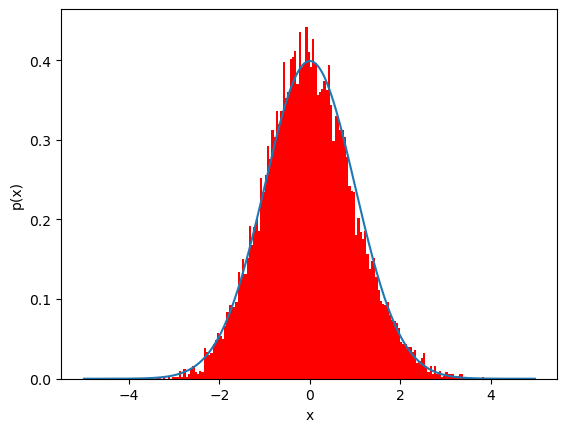

In [8]:
# We now demonstrate the central limit theorem. Generate nreal realisations of sets of nsamp 
# samples from a distribution of your choice. Here we use the Gamma(2,4) distribution, with
# nsamp=1 and nreal=10000. Compare the distribution of standardised sample means to 
# N(0,1).
nreal=10000
nsamp=100
n=2.0
rate=4.0
mean=n/rate
var=n/(rate**2)
snstar=np.zeros(nreal)
for i in range(nreal):
    samples=np.random.gamma(n,1.0/rate,nsamp)
    snstar[i]=(sum(samples)-nsamp*mean)/np.sqrt(nsamp*var)
xvs=np.arange(-5.,5.,step=0.02)
yvs=stats.norm.pdf(xvs,0.,1.)
histxs=np.arange(-5.,5.,0.05)
counts,edges,patches=plt.hist(snstar,bins=histxs,color="red",density=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.plot(xvs, yvs)


In [9]:
# Q3) Now try different choices of nsamp. You could also try using different distributions (optional).

# Cramer-Rao bound

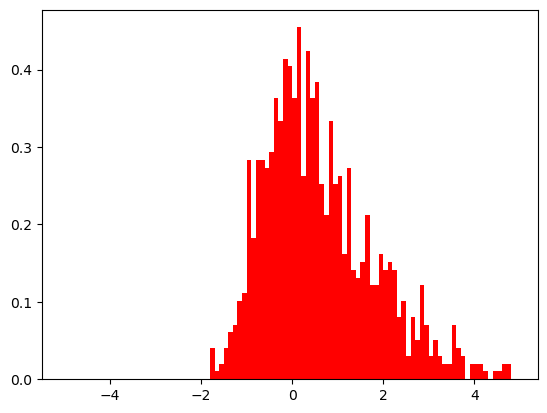

In [10]:
# We consider in this section the distribution with pdf p( x | lam ) = lam*exp(-x-lam*exp(-x)), which is a 
# type of Gumbel distribution. Python does not have this particular form of Gumbel distribtuion as a 
# built-in distribution. However, if X ~ p(x|lam) then Z = exp(-X) follows an exponential distribution with 
# parameter lam (EXERCISE). We draw samples like this
lam=1
nsamp=1000
samples=-np.log(np.random.exponential(1.0/lam,nsamp))
histxs=np.arange(-5.,5.,0.1)
counts,edges,patches=plt.hist(samples,bins=histxs,color="red",density=True)

In [11]:
# The Cramer-Rao bound for this distribution is lam^2/n (EXERCISE), but this is not attainable. The median of 
# an exponential distribution with parameter lam is ln(2)/lam. Therefore the estimator ln(2)/exp(-median(X)) 
# should provide an estimate of lam. We compute the mean and variance of this estimator for sample sizes of 
# nsamp=10.
lam=1.0
nsamp=10
CRbound=lam*lam/nsamp
nreal=1000
meanest=np.zeros(nreal)
for i in range(nreal):
    samples=-np.log(np.random.exponential(1.0/lam,nsamp))
    meanest[i]=np.log(2)/np.exp(-1.0*stats.scoreatpercentile(samples,50))
print("Mean = " + str(stats.tmean(meanest)) + ", bias = " + str(stats.tmean(meanest)-lam) + ", variance = " + str((stats.tstd(meanest))**2) + ", CR bound = " + str(CRbound))

Mean = 1.1488341334021275, bias = 0.14883413340212748, variance = 0.3683227290130682, CR bound = 0.1


In [12]:
# Q4) The previous estimator is biased and therefore it is more difficult to use the CR bound. Define 
# ZZ = sum  exp(-X_i). The expectation value of 1/ZZ is lam/(n-1) (EXERCISE) and therefore (n-1)/ZZ is an 
# unbiased estimator of lam. Generate samples from this estimator and compare the efficiency of this 
# estimator to the CR bound.

In [13]:
lam=1.0
nsamp=10
CRbound=lam*lam/nsamp
nreal=1000
meanest=np.zeros(nreal)
for i in range(nreal):
    samples=-np.log(np.random.exponential(1.0/lam,nsamp))
    meanest[i]=(nsamp-1.0)/np.sum(np.exp(-1.0*samples))
print("Mean = " + str(stats.tmean(meanest)) + ", bias = " + str(stats.tmean(meanest)-lam) + ", variance = " + str((stats.tstd(meanest))**2) + ", CR bound = " + str(CRbound))

Mean = 0.9977062008138077, bias = -0.0022937991861923246, variance = 0.12450888111560937, CR bound = 0.1


In [14]:
# The MLE is n/ZZ (ZZ as defined in the previous question) and so by the previous results the MLE will be biased, 
# but asymptotically unbiased, consistent and efficient as usual. 

# Maximum likelihood estimator

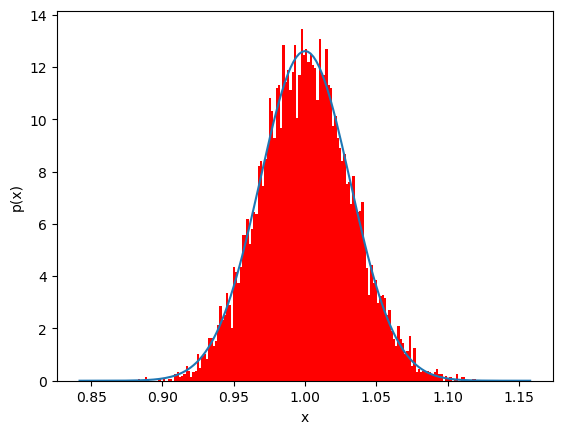

In [15]:
# Consider, as on the problem set and in the lectures, samples from the exponential distribution with parameter lam.
# The MLE is n/sum(x_i) [as in the prevous question]. The Fisher matrix is n/lam^2, so we expect the MLE to converge 
# to an N(lam, lam^2/n) distribution as n -> infinity. We start by simulating nreal = 10000 realisations of 
# nsamp = 1 samples from this distribution, compute the MLE in each case and compare the distribution to the
# asymptotic prediction.
lam=1.0
nreal=10000
nsamp=1000
var=lam*lam/nsamp
mle=np.zeros(nreal)
for i in range(nreal):
    samples=np.random.exponential(1.0/lam,nsamp)
    mle[i]=(nsamp)/sum(samples)
xvs=np.arange(lam-5.*np.sqrt(var),lam+5.*np.sqrt(var),step=0.002)
yvs=stats.norm.pdf(xvs,lam,np.sqrt(var))
histxs=np.arange(lam-5.*np.sqrt(var),lam+5.*np.sqrt(var),0.05*np.sqrt(var))
counts,edges,patches=plt.hist(mle,bins=histxs,color="red",density=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.plot(xvs, yvs)

In [16]:
# Q5) Try increasing nsamp until the sampling distribution approaches the predicted normal distribution.

# Confidence intervals

In [17]:
# We generate samples from a Normal distribution with mean mu and (known) variance sigmasq=1.

mu=1
nsamp=10
samples=np.random.normal(mu,1.0,nsamp)

# We want to construct a confidence interval for mu. We know that the sample mean bar(x) has 
# mean mu and variance 1/nsamp. Therefore a (1-alpha)% confidence interval is given by 
# [bar(x)-z_low/sqrt(nsamp), bar(x) + z_up/sqrt(nsamp)] where z_low, z_up are any points such
# that the range [z_low, z_up] contains (1-alpha)% of the probability of a standard Normal 
# distribution. We can find these points using the python ppf command. Here we compute the 
# boundaries for a symmetric 95% confidence interval.

muhat=stats.tmean(samples)
alpha=0.05
plow=0.5*alpha
phigh=1-alpha+plow
zlow=stats.norm.ppf(plow)
zhigh=stats.norm.ppf(phigh)
print("The confidence interval is [" + str(muhat+zlow/np.sqrt(nsamp)) + ", " + str(muhat+zhigh/np.sqrt(nsamp)) + "]")

The confidence interval is [0.1779703055672397, 1.4175603701763628]


In [18]:
# The confidence interval should have the property that the (random) interval constructed over 
# many realisations of the sample contains the true value (1-alpha)% of the time. We test this
# with a simulation study.

mu=1
nsamp=10

nreal=10000
nmissed=0
lowbound=np.zeros(nreal)
upbound=np.zeros(nreal)
for i in range(nreal):
    samples=np.random.normal(mu,1.0,nsamp)
    muhat=stats.tmean(samples)
    lowbound[i]=muhat+zlow/np.sqrt(nsamp)
    upbound[i]=muhat+zhigh/np.sqrt(nsamp)
    if (mu<lowbound[i]):
        nmissed+=1
    if (mu>upbound[i]):
        nmissed+=1
print((1.0*nmissed)/(1.0*nreal))
print(100.-stats.percentileofscore(lowbound,mu))
print(stats.percentileofscore(upbound,mu))

0.0506
2.480000000000004
2.58


In [19]:
# Q6) Repeat the above procedure, but now assuming the variance is unknown. In that case the confidence 
# interval is [bar(x)-t_low*hat(sigma)/sqrt(nsamp), bar(x) + t_up*hat(sigma)/sqrt(low)], where t_low 
# and t_up are upper and lower points of the t distributionm with nsamp-1 degrees of freedom, and 
# hat(sigma)^2 = sum (x_i - bar(x))^2/(n-1) is the unbiased estimator of the variance.

# Hypothesis testing

In [20]:
# First we'll do some standard tests

# z-test

In [21]:
# Generate some data and do one z-test
n=10
mu1=4
m=20
mu2=6
var=1
std=np.sqrt(var)
xsamples=np.random.normal(mu1,std,n)
ysamples=np.random.normal(mu2,std,m)
teststat=np.abs(stats.tmean(xsamples)-stats.tmean(ysamples))/(std*np.sqrt(1./n+1./m))

# Need to compute threshold
alpha=0.05
zthresh=stats.norm.ppf(1-alpha*0.5)
print("The test statistic is " + str(teststat) + ", which we compare to threshold z = " + str(zthresh))
if (teststat > zthresh):
    print("Outcome: reject")
else:
    print("Outcome: accept")

The test statistic is 5.7671567728260635, which we compare to threshold z = 1.959963984540054
Outcome: reject


In [22]:
# Now we do a simulation study to check the significance level is correctly specified. Must set mu2=mu1 
# since significance is specified by the null hypothesis
mu2=mu1
nreal=10000
rejected=0.0
for i in range(nreal):
    xsamples=np.random.normal(mu1,std,n)
    ysamples=np.random.normal(mu2,std,m)
    teststat=np.abs(stats.tmean(xsamples)-stats.tmean(ysamples))/(std*np.sqrt(1./n+1./m))
    if (teststat > zthresh):
        rejected+=1.0
print("We rejected the hypothesis in " +str(rejected/nreal) + " percent of the samples.")

We rejected the hypothesis in 0.053 percent of the samples.


In [23]:
# Now compute power. First compute an ROC curve, via simulation
alpha=np.arange(0.001,0.999,0.001)
thresh=stats.norm.ppf(1.-alpha*0.5)
mu2=5
detratez=np.zeros_like(alpha)
nreal=10000
for i in range(nreal):
    xsamples=np.random.normal(mu1,std,n)
    ysamples=np.random.normal(mu2,std,m)
    teststat=np.abs(stats.tmean(xsamples)-stats.tmean(ysamples))/(std*np.sqrt(1./n+1./m))
    thismap=thresh<teststat
    detratez[thismap]+=1.0/nreal

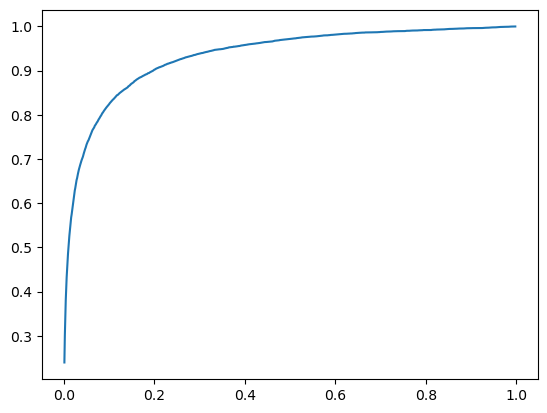

In [24]:
plt.plot(alpha,detratez)

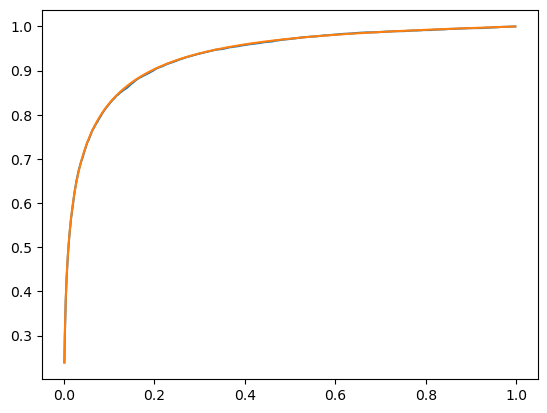

In [25]:
# Can compute detection rate analytically in this case, since the test statistic follows a N(mu2-mu1,1)
# distribution under the alternative hypothesis
deltamean=(mu2-mu1)/(std*np.sqrt(1./n+1./m))
plt.plot(alpha,detratez)
plt.plot(alpha,1-stats.norm.cdf(thresh,deltamean,1)+stats.norm.cdf(-thresh,deltamean,1))

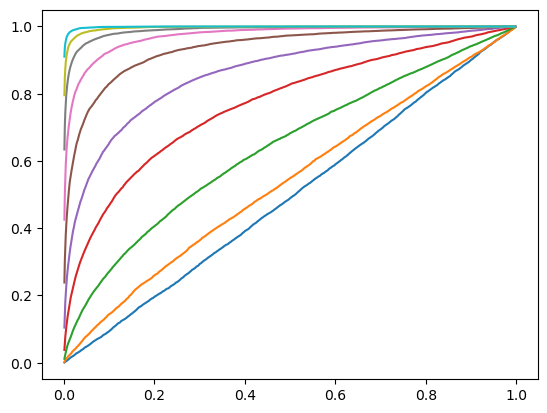

In [26]:
# Explore how power changes with mu2

alpha=np.arange(0.001,0.999,0.001)
thresh=stats.norm.ppf(1-alpha*0.5)
mulist=np.arange(4,6,0.2)
nreal=10000
for mu in range(len(mulist)):
    thisdetratez=np.zeros_like(alpha)
    for i in range(nreal):
        xsamples=np.random.normal(mu1,std,n)
        ysamples=np.random.normal(mulist[mu],std,m)
        teststat=np.abs(stats.tmean(xsamples)-stats.tmean(ysamples))/(std*np.sqrt(1./n+1./m))
        thismap=thresh<teststat
        thisdetratez[thismap]+=1.0/nreal
    plt.plot(alpha,thisdetratez)

# t-test

In [27]:
# Q7) Repeat the above analysis, but using a t-test.

# Pure significance test for clustering

In [28]:
# Q8) We finish by looking at a different problem. We are testing to see if 
# salamanders are sensitive to polarized light. In a controlled experiment salamanders are placed 
# in the centre of a circular pool which was illuminated by polarized light. We observe the point 
# (measured as an angle in degrees from some reference direction) at which the salamanders first 
# reach the boundary of the pool. We want to test the hypothesis that the directions the salamanders 
# move are random (so the angles are distributed uniformly on the circle) against two possible 
# alternative hypotheses:
#
# 1) There is clustering about the reference direction and its opposite direction.
# 2) There is clustering about two opposite but otherwise unspecified directions.
#
# In an experiment with 19 animals we observed the following results

angledata=np.array([3.,14.,42.,51.,138.,156.,156.,174.,180.,202.,210.,216.,216.,246.,302.,319.,319.,325.,358.])
angledata=angledata*np.pi/180.
nsamp=len(angledata)

# To test these hypotheses we need to design suitable test statistics. To test 1, suitable test statistics 
# could be a) sum (cos(2 x_j)) [or equivalently sum (cos(x_j))^2]; b) sum |cos(x_j)|. To test 2, a 
# suitable statistic might be c) (sum cos(2 x_j))^2 + (sum sin(2 x_j))^2.

#   i) Compute thresholds for all of these statistics numerically and through a normal approximation.
#
#  ii) Evaluate the significance level of the observed data for each of the test statistics, using both the
#      numerical distribution and the Normal approximation.
#
# iii) Consider the question: which of the two tests of the first  hypothesis is best? To find the more 
#      powerful test we need to specify the alternative hypothesis. One option is to assume the points 
#      are drawn from a sum of two opposite von Mises distributions. Samples from such a distribution 
#      can be drawn as follows (you can use different values for the von Mises parameters loc and lam):

loc=0.
lam=2.
nsamp=len(angledata)
mask=np.random.binomial(1,0.5,nsamp)
axissamps=np.random.vonmises(loc,lam,nsamp)
oppsamps=np.random.vonmises(loc+np.pi,lam,nsamp)
samples=mask*axissamps+(1.-mask)*oppsamps

#  iv) (OPTIONAL) Try inventing another test statistic, for example the fraction of points within s 
#      degrees of the axis, and evaluate its performance, both on this data set and with the von Mises 
#      alternative.